    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

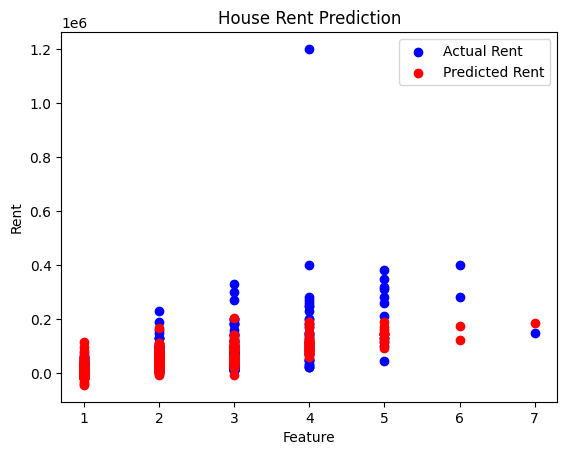

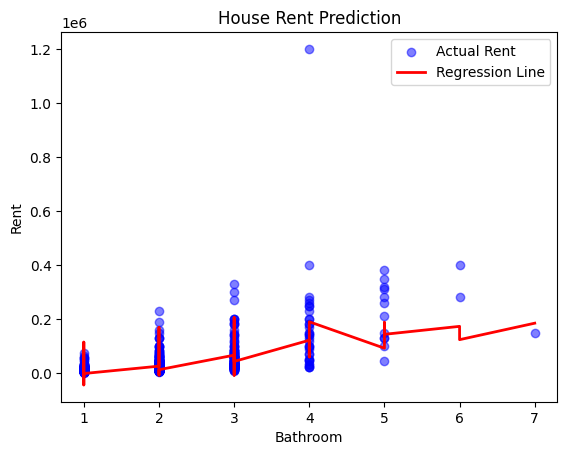

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset 
data = pd.read_csv('House_Rent_Dataset.csv')

# Strip spaces from column names to avoid errors
data.columns = data.columns.str.strip()

# Handle missing values 
data.dropna(inplace=True)

# Display first 5 rows 
print(data.head())

# Selecting relevant features and target variable
X = data[['Area Type', 'Floor', 'City', 'Bathroom']]
y = data['Rent']

# Convert categorical variables using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Display regression coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Visualizing the regression (for single feature visualization, e.g., Floor)
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Rent')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted Rent')
plt.xlabel('Feature')
plt.ylabel('Rent')
plt.title('House Rent Prediction')
plt.legend()
plt.show()

# Selecting a single numerical feature (e.g., number of bathrooms) for visualization
feature = 'Bathroom'  # Change this to another numeric feature if needed

# Extracting the corresponding column
X_test_feature = X_test[[feature]]

# Sorting values for a continuous regression line
sorted_indices = X_test_feature[feature].argsort()
X_sorted = X_test_feature.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting actual vs. predicted values
plt.scatter(X_test_feature, y_test, color='blue', label='Actual Rent', alpha=0.5)
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')
plt.xlabel(feature)
plt.ylabel('Rent')
plt.title('House Rent Prediction')
plt.legend()
plt.show()
